# Data Collection

In [ ]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [ ]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [ ]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [ ]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [ ]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [ ]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [ ]:
response = requests.get(spacex_url)

In [ ]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [ ]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [ ]:
response.status_code

200

In [ ]:
data = pd.json_normalize(response.json())

In [ ]:
data.head(5)

static_fire_date_utc  static_fire_date_unix    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False     0.0   
1                      None                    NaN  False     0.0   
2                      None                    NaN  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False     0.0   
4                      None                    NaN  False     0.0   

                     rocket success  \
0  5e9d0d95eda69955f709d1eb   False   
1  5e9d0d95eda69955f709d1eb   False   
2  5e9d0d95eda69955f709d1eb   False   
3  5e9d0d95eda69955f709d1eb    True   
4  5e9d0d95eda69955f709d1eb    True   

                                                                                                            failures  \
0                                                [{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]   
1            [{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]   
2  [{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]   
3                                                                                                                 []   
4                                                                                                                 []   

                                                                                                                                                                                details  \
0                                                                                                                                      Engine failure at 33 seconds and loss of vehicle   
1  Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage   
2                                                                                                                  Residual stage 1 thrust led to collision between stage 1 and stage 2   
3                        Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1   
4                                                                                                                                                                                  None   

  crew ships capsules                                              payloads  \
0   []    []       []                            [5eb0e4b5b6c3bb0006eeb1e1]   
1   []    []       []                            [5eb0e4b6b6c3bb0006eeb1e2]   
2   []    []       []  [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]   
3   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e5]   
4   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e6]   

                  launchpad  flight_number         name  \
0  5e9e4502f5090995de566f86              1    FalconSat   
1  5e9e4502f5090995de566f86              2      DemoSat   
2  5e9e4502f5090995de566f86              3  Trailblazer   
3  5e9e4502f5090995de566f86              4       RatSat   
4  5e9e4502f5090995de566f86              5     RazakSat   

                   date_utc   date_unix                 date_local  \
0  2006-03-24T22:30:00.000Z  1143239400  2006-03-25T10:30:00+12:00   
1  2007-03-21T01:10:00.000Z  1174439400  2007-03-21T13:10:00+12:00   
2  2008-08-03T03:34:00.000Z  1217734440  2008-08-03T15:34:00+12:00   
3  2008-09-28T23:15:00.000Z  1222643700  2008-09-28T11:15:00+12:00   
4  2009-07-13T03:35:00.000Z  1247456100  2009-07-13T15:35:00+12:00   

  date_precision  upcoming  \
0           hour     False   
1           hour     False   
2           hour     False   
3           hour     False   
4           hour     False   

                                                                                 

In [ ]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [ ]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [ ]:
BoosterVersion

[]

In [ ]:
# Call getBoosterVersion
getBoosterVersion(data)

In [ ]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [ ]:
# Call getLaunchSite
getLaunchSite(data)

In [ ]:
# Call getPayloadData
getPayloadData(data)

In [ ]:
# Call getCoreData
getCoreData(data)

In [ ]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [ ]:
df = pd.DataFrame(launch_dict)
df.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Merlin2A  167.743129   9.047721  
2    NaN            0  Merlin2C  167.743129   9.047721  
3    NaN            0  Merlin3C  167.743129   9.047721  
4    1.0            0     B0003  -80.577366  28.561857

In [ ]:
data_falcon9 = df[df['BoosterVersion']!='Falcon 1']
data_falcon9.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             6  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             8  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6            10  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7            11  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8            12  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5            0  B0005  -80.577366  28.561857  
6            0  B0007  -80.577366  28.561857  
7            0  B1003 -120.610829  34.632093  
8            0  B1004  -80.577366  28.561857

In [ ]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4              1  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5              2  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6              3  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7              4  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8              5  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   
..           ...         ...            ...          ...   ...           ...   
89            86  2020-09-03       Falcon 9      15600.0  VLEO    KSC LC 39A   
90            87  2020-10-06       Falcon 9      15600.0  VLEO    KSC LC 39A   
91            88  2020-10-18       Falcon 9      15600.0  VLEO    KSC LC 39A   
92            89  2020-10-24       Falcon 9      15600.0  VLEO  CCSFS SLC 40   
93            90  2020-11-05       Falcon 9       3681.0   MEO  CCSFS SLC 40   

        Outcome  Flights  GridFins  Reused   Legs                LandingPad  \
4     None None        1     False   False  False                      None   
5     None None        1     False   False  False                      None   
6     None None        1     False   False  False                      None   
7   False Ocean        1     False   False  False                      None   
8     None None        1     False   False  False                      None   
..          ...      ...       ...     ...    ...                       ...   
89    True ASDS        2      True    True   True  5e9e3032383ecb6bb234e7ca   
90    True ASDS        3      True    True   True  5e9e3032383ecb6bb234e7ca   
91    True ASDS        6      True    True   True  5e9e3032383ecb6bb234e7ca   
92    True ASDS        3      True    True   True  5e9e3033383ecbb9e534e7cc   
93    True ASDS        1      True   False   True  5e9e3032383ecb6bb234e7ca   

    Block  ReusedCount Serial   Longitude   Latitude  
4     1.0            0  B0003  -80.577366  28.561857  
5     1.0            0  B0005  -80.577366  28.561857  
6     1.0            0  B0007  -80.577366  28.561857  
7     1.0            0  B1003 -120.610829  34.632093  
8     1.0            0  B1004  -80.577366  28.561857  
..    ...          ...    ...         ...        ...  
89    5.0           12  B1060  -80.603956  28.608058  
90    5.0           13  B1058  -80.603956  28.608058  
91    5.0           12  B1051  -80.603956  28.608058  
92    5.0           12  B1060  -80.577366  28.561857  
93    5.0            8  B1062  -80.577366  28.561857  

[90 rows x 17 columns]

In [ ]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [ ]:
payload_mean = df['PayloadMass'].mean()
df['PayloadMass'].replace(np.nan, payload_mean, inplace=True)

<ipython-input-27-602ddb3e1389>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PayloadMass'].replace(np.nan, payload_mean, inplace=True)


In [ ]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

# Web Scraping using BeautifulSoup

In [ ]:
!pip3 install beautifulsoup4
!pip3 install requests

In [ ]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [ ]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    colunm_name = ' '.join(row.contents)

    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name


In [ ]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [ ]:
response = requests.get(static_url)

In [ ]:
soup = BeautifulSoup(response.text,'html.parser')
soup


<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limite

In [ ]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [ ]:
html_tables = soup.find_all('table')
html_tables

[<table class="col-begin" role="presentation">
 <tbody><tr>
 <td class="col-break">
 <div class="mw-heading mw-heading3"><h3 id="Rocket_configurations">Rocket configurations</h3></div>
 <div class="chart noresize" style="padding-top:10px;margin-top:1em;max-width:420px;">
 <div style="position:relative;min-height:320px;min-width:420px;max-width:420px;">
 <div style="float:right;position:relative;min-height:240px;min-width:320px;max-width:320px;border-left:1px black solid;border-bottom:1px black solid;">
 <div style="position:absolute;left:3px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit-print-color-adjust:exact;border:1px solid LightSteelBlue;border-bottom:none;overflow:hidden;" title="[[Falcon 9 v1.0]]: 2"></div>
 <div style="position:absolute;left:55px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit-print-color-adjust:exact;border:1px solid LightSteelBlue;border-bottom:none;overflow:hidden;" tit

In [ ]:
# Let's print the third table and check its content
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [ ]:
column_names = []

# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names

th_elements = first_launch_table.find_all('th')
for i in th_elements:
  col = extract_column_from_header(i)
  if(col !=None and len(col)>0):
    column_names.append(col)

column_names

['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome']

In [ ]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [ ]:
extracted_row = 0
#Extract each table
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element
        row=rows.find_all('td')
        #if it is number save cells in a dictonary
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            #print(flight_number)
            launch_dict['Flight No.'].append(flight_number)
            print(flight_number)
            datatimelist=date_time(row[0])

            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            print(date)

            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            print(time)
            #print(time)

            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict['Version Booster'].append(bv)
            print(bv)

            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            print(launch_site)
            #print(launch_site)

            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            print(payload)
            #print(payload)

            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            print(payload_mass)
            #print(payload)

            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            print(orbit)
            #print(orbit)

            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            if row[6].a!=None:
                customer = row[6].a.string
            else:
                customer='None'
            launch_dict['Customer'].append(customer)
            print(customer)

            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            print(launch_outcome)
            #print(launch_outcome)

            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            print(booster_landing)
            #print(booster_landing)

            print("******")


1
4 June 2010
18:45
F9 v1.07B0003.18
CCAFS
Dragon Spacecraft Qualification Unit
0
LEO
SpaceX
Success

Failure
******
2
8 December 2010
15:43
F9 v1.07B0004.18
CCAFS
Dragon
0
LEO
NASA
Success
Failure
******
3
22 May 2012
07:44
F9 v1.07B0005.18
CCAFS
Dragon
525 kg
LEO
NASA
Success
No attempt

******
4
8 October 2012
00:35
F9 v1.07B0006.18
CCAFS
SpaceX CRS-1
4,700 kg
LEO
NASA
Success

No attempt
******
5
1 March 2013
15:10
F9 v1.07B0007.18
CCAFS
SpaceX CRS-2
4,877 kg
LEO
NASA
Success

No attempt

******
6
29 September 2013
16:00
F9 v1.17B10038
VAFB
CASSIOPE
500 kg
Polar orbit
MDA
Success
Uncontrolled
******
7
3 December 2013
22:41
F9 v1.1
CCAFS
SES-8
3,170 kg
GTO
SES
Success
No attempt
******
8
6 January 2014
22:06
F9 v1.1
CCAFS
Thaicom 6
3,325 kg
GTO
Thaicom
Success
No attempt
******
9
18 April 2014
19:25
F9 v1.1
Cape Canaveral
SpaceX CRS-3
2,296 kg
LEO
NASA
Success

Controlled
******
10
14 July 2014
15:15
F9 v1.1
Cape Canaveral
Orbcomm-OG2
1,316 kg
LEO
Orbcomm
Success
Controlled
******
1

In [ ]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

In [ ]:
df.to_csv('spacex_web_scraped.csv', index=False)

#Data Wrangling

In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   
6             7  2014-04-18       Falcon 9  2296.000000   ISS  CCAFS SLC 40   
7             8  2014-07-14       Falcon 9  1316.000000   LEO  CCAFS SLC 40   
8             9  2014-08-05       Falcon 9  4535.000000   GTO  CCAFS SLC 40   
9            10  2014-09-07       Falcon 9  4428.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   
5    None None        1     False   False  False        NaN    1.0   
6   True Ocean        1     False   False   True        NaN    1.0   
7   True Ocean        1     False   False   True        NaN    1.0   
8    None None        1     False   False  False        NaN    1.0   
9    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  
0            0  B0003  -80.577366  28.561857  
1            0  B0005  -80.577366  28.561857  
2            0  B0007  -80.577366  28.561857  
3            0  B1003 -120.610829  34.632093  
4            0  B1004  -80.577366  28.561857  
5            0  B1005  -80.577366  28.561857  
6            0  B1006  -80.577366  28.561857  
7            0  B1007  -80.577366  28.561857  
8            0  B1008  -80.577366  28.561857  
9            0  B1011  -80.577366  28.561857

In [ ]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [ ]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [ ]:
df["LaunchSite"].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [ ]:
# Apply value_counts on Orbit column
df["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [ ]:
# landing_outcomes = values on Outcome column
landing_outcomes = df["Outcome"].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [ ]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [ ]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [ ]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

def onehot(item):
    if item in bad_outcomes:
        return 0
    else:
        return 1
landing_class = df["Outcome"].apply(onehot)
landing_class

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: Outcome, Length: 90, dtype: int64

In [ ]:
df['Class']=landing_class
df[['Class']].head(8)

Class
0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      1

In [ ]:
df.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

In [ ]:
df["Class"].mean()

0.6666666666666666

#EDA with SQL

In [ ]:
!pip install sqlalchemy==1.3.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp310-cp310-linux_x86_64.whl size=1192331 sha256=90f85a4ede274de23a9f048182cfe06340e6c4f8b806fbc8fd5f329d67bb87e4
  Stored in directory: /root/.cache/pip/wheels/8b/6d/9c/e1793e5a2d85b89b8c362a4f0e3def54b786bcd14923b9ff00
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.
langchain 0.3.7 requires

In [ ]:
!pip install ipython-sql
!pip install ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [ ]:
!pip install -q pandas

In [ ]:
%sql sqlite:///my_data1.db

In [ ]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [ ]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [ ]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [ ]:
%sql select * from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


[('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)'),
 ('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)'),
 ('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt'),
 ('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'),
 ('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'),
 ('2013-09-29', '16:00:00', 'F9 v1.1  B1003', 'VAFB SLC-4E', 'CASSIOPE', 500, 'Polar LEO', 'MDA', 'Success', 'Uncontrolled (ocean)'),
 ('2013-12-03', '22:41:00', 'F9 v1.1', 'CCAFS LC-40', 'SES-8', 3170, 'GTO', 'SES', 'Success', 'No attempt'),
 ('2014-01-06', '22:06:00', 'F9 v1.1', 'CCAFS LC-40', 'Thaicom 6', 3325, 'GTO', 'Thaicom', 'Success', 'No attempt'),
 ('2014-04-18', '19:25:00', 'F9 v1.1', 'CCAFS LC-40', 'SpaceX CRS-3', 2296, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Controlled (ocean)'),
 ('2014-07-14', '15:15:00', 'F9 v1.1', 'CCAFS LC-40', 'OG2 Mission 1  6 Orbcomm-OG2 satellites', 1316, 'LEO', 'Orbcomm', 'Success', 'Controlled (ocean)'),
 ('2014-08-05', '8:00:00', 'F9 v1.1', 'CCAFS LC-40', 'AsiaSat 8', 4535, 'GTO', 'AsiaSat', 'Success', 'No attempt'),
 ('2014-09-07', '5:00:00', 'F9 v1.1 B1011', 'CCAFS LC-40', 'AsiaSat 6', 4428, 'GTO', 'AsiaSat', 'Success', 'No attempt'),
 ('2014-09-21', '5:52:00', 'F9 v1.1 B1010', 'CCAFS LC-40', 'SpaceX CRS-4', 2216, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Uncontrolled (ocean)'),
 ('2015-01-10', '9:47:00', 'F9 v1.1 B1012', 'CCAFS LC-40', 'SpaceX CRS-5', 2395, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Failure (drone ship)'),
 ('2015-02-11', '23:03:00', 'F9 v1.1 B1013', 'CCAFS LC-40', 'DSCOVR', 570, 'HEO', 'U.S. Air Force NASA NOAA', 'Success', 'Controlled (ocean)'),
 ('2015-03-02', '3:50:00', 'F9 v1.1 B1014', 'CCAFS LC-40', 'ABS-3A Eutelsat 115 West B', 4159, 'GTO', 'ABS Eutelsat', 'Success', 'No attempt'),
 ('2015-04-14', '20:10:00', 'F9 v1.1 B1015', 'CCAFS LC-40', 'SpaceX CRS-6', 1898, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Failure (drone ship)'),
 ('2015-04-27', '23:03:00', 'F9 v1.1 B1016', 'CCAFS LC-40', 'Turkmen 52 / MonacoSAT', 4707, 'GTO', 'Turkmenistan National Space Agency', 'Success', 'No attempt'),
 ('2015-06-28', '14:21:00', 'F9 v1.1 B1018', 'CCAFS LC-40', 'SpaceX CRS-7', 1952, 'LEO (ISS)', 'NASA (CRS)', 'Failure (in flight)', 'Precluded (drone ship)'),
 ('2015-12-22', '1:29:00', 'F9 FT B1019', 'CCAFS LC-40', 'OG2 Mission 2  11 Orbcomm-OG2 satellites', 2034, 'LEO', 'Orbcomm', 'Success', 'Success (ground pad)'),
 ('2016-01-17', '18:42:00', 'F9 v1.1 B1017', 'VAFB SLC-4E', 'Jason-3', 553, 'LEO', 'NASA (LSP) NOAA CNES', 'Success', 'Failure (drone ship)'),
 ('2016-03-04', '23:35:00', 'F9 FT B1020', 'CCAFS LC-40', 'SES-9', 5271, 'GTO', 'SES', 'Success', 'Failure (drone ship)'),
 ('2016-04-08', '20:43:00', 'F9 FT B1021.1', 'CCAFS LC-40', 'SpaceX CRS-8', 3136, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Success (drone ship)'),
 ('2016-05-06', '5:21:00', 'F9 FT B1022', 'CCAFS LC-40', 'JCSAT-14', 4696, 'GTO', 'SKY Perfect JSAT Group', 'Success', 'Success (drone ship)'),
 ('2016-05-27', '21:39:00', 'F9 FT B1023.1', 'CCAFS LC-40', 'Thaicom 8', 3100, 'GTO', 'Thaicom', 'Success', 'Success (drone ship)'),
 ('2016-06-15', '14:29:00', 'F9 FT B1024', 'CCAFS LC-40', 'ABS-2A Eutelsat 117 West B', 3600, 'GTO', 'ABS Eutelsat', 'Success', 'Failure (drone ship)'),
 ('2016-07-18', '4:45:00', 'F9 FT B1025.1', 'CCAFS LC-40', 'SpaceX CRS-9', 2257, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Success (ground pad)'),
 ('2016-08-14', '5:26:00', 'F9 FT B1026', 'CCAFS LC-40', 'JCSAT-16', 4600, 'GTO', 'SKY Perfect JSAT Group', 'Success', 'Success (drone ship)'),
 ('2017-01-1

In [ ]:
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[('CCAFS LC-40',), ('VAFB SLC-4E',), ('KSC LC-39A',), ('CCAFS SLC-40',)]

In [ ]:
%sql SELECT * FROM SPACEXTABLE WHERE "Launch_Site" LIKE "CCA%" LIMIT 5;

 * sqlite:///my_data1.db
Done.


[('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)'),
 ('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)'),
 ('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt'),
 ('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'),
 ('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')]

In [ ]:
%sql SELECT SUM("PAYLOAD_MASS__KG_") AS "Total_Payload_Mass" FROM SPACEXTABLE WHERE "Customer" = "NASA (CRS)";

 * sqlite:///my_data1.db
Done.


[(45596,)]

In [ ]:
%sql SELECT AVG("PAYLOAD_MASS__KG_") AS "Average_Payload_Mass" FROM SPACEXTABLE WHERE "Booster_Version" LIKE "F9 v1.1%";

 * sqlite:///my_data1.db
Done.


[(2534.6666666666665,)]

In [ ]:
%sql SELECT MIN("Date") AS "First_Success_Date" FROM SPACEXTABLE WHERE "Landing_Outcome" = "Success (ground pad)";

 * sqlite:///my_data1.db
Done.


[('2015-12-22',)]

In [ ]:
#booster names
%sql SELECT DISTINCT "Booster_Version" FROM SPACEXTABLE WHERE "Landing_Outcome" = "Success (drone ship)" AND "PAYLOAD_MASS__KG_" > 4000 AND "PAYLOAD_MASS__KG_" < 6000;

 * sqlite:///my_data1.db
Done.


[('F9 FT B1022',), ('F9 FT B1026',), ('F9 FT  B1021.2',), ('F9 FT  B1031.2',)]

In [ ]:
%sql SELECT COUNT("Mission_Outcome") AS "Successful_Missions" FROM SPACEXTABLE WHERE "Mission_Outcome" LIKE "Success%";

 * sqlite:///my_data1.db
Done.


[(100,)]

In [ ]:
%sql SELECT COUNT("Mission_Outcome") AS "Failure_Missions" FROM SPACEXTABLE WHERE "Mission_Outcome" LIKE "Failure%";

 * sqlite:///my_data1.db
Done.


[(1,)]

In [ ]:
%sql SELECT DISTINCT "Booster_Version" FROM SPACEXTABLE WHERE "PAYLOAD_MASS__KG_" = (SELECT MAX("PAYLOAD_MASS__KG_") FROM SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


[('F9 B5 B1048.4',),
 ('F9 B5 B1049.4',),
 ('F9 B5 B1051.3',),
 ('F9 B5 B1056.4',),
 ('F9 B5 B1048.5',),
 ('F9 B5 B1051.4',),
 ('F9 B5 B1049.5',),
 ('F9 B5 B1060.2 ',),
 ('F9 B5 B1058.3 ',),
 ('F9 B5 B1051.6',),
 ('F9 B5 B1060.3',),
 ('F9 B5 B1049.7 ',)]

In [ ]:
#List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
%sql SELECT SUBSTR("Date",6,2) AS "Month_names", "Landing_Outcome","Booster_Version","Launch_site" FROM SPACEXTABLE WHERE "Landing_Outcome" = "Failure (drone ship)" AND substr(Date,0,5)='2015';

 * sqlite:///my_data1.db
Done.


[('01', 'Failure (drone ship)', 'F9 v1.1 B1012', 'CCAFS LC-40'),
 ('04', 'Failure (drone ship)', 'F9 v1.1 B1015', 'CCAFS LC-40')]

In [ ]:
#Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.
%sql SELECT "Landing_Outcome", COUNT("Landing_Outcome") AS "Count" FROM SPACEXTABLE WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY "Landing_Outcome" ORDER BY "Count" DESC

 * sqlite:///my_data1.db
Done.


[('No attempt', 10),
 ('Success (drone ship)', 5),
 ('Failure (drone ship)', 5),
 ('Success (ground pad)', 3),
 ('Controlled (ocean)', 3),
 ('Uncontrolled (ocean)', 2),
 ('Failure (parachute)', 2),
 ('Precluded (drone ship)', 1)]

#EDA with Pandas and Matplotlib


In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
# from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp = await fetch(URL)
# dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(URL)
df.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

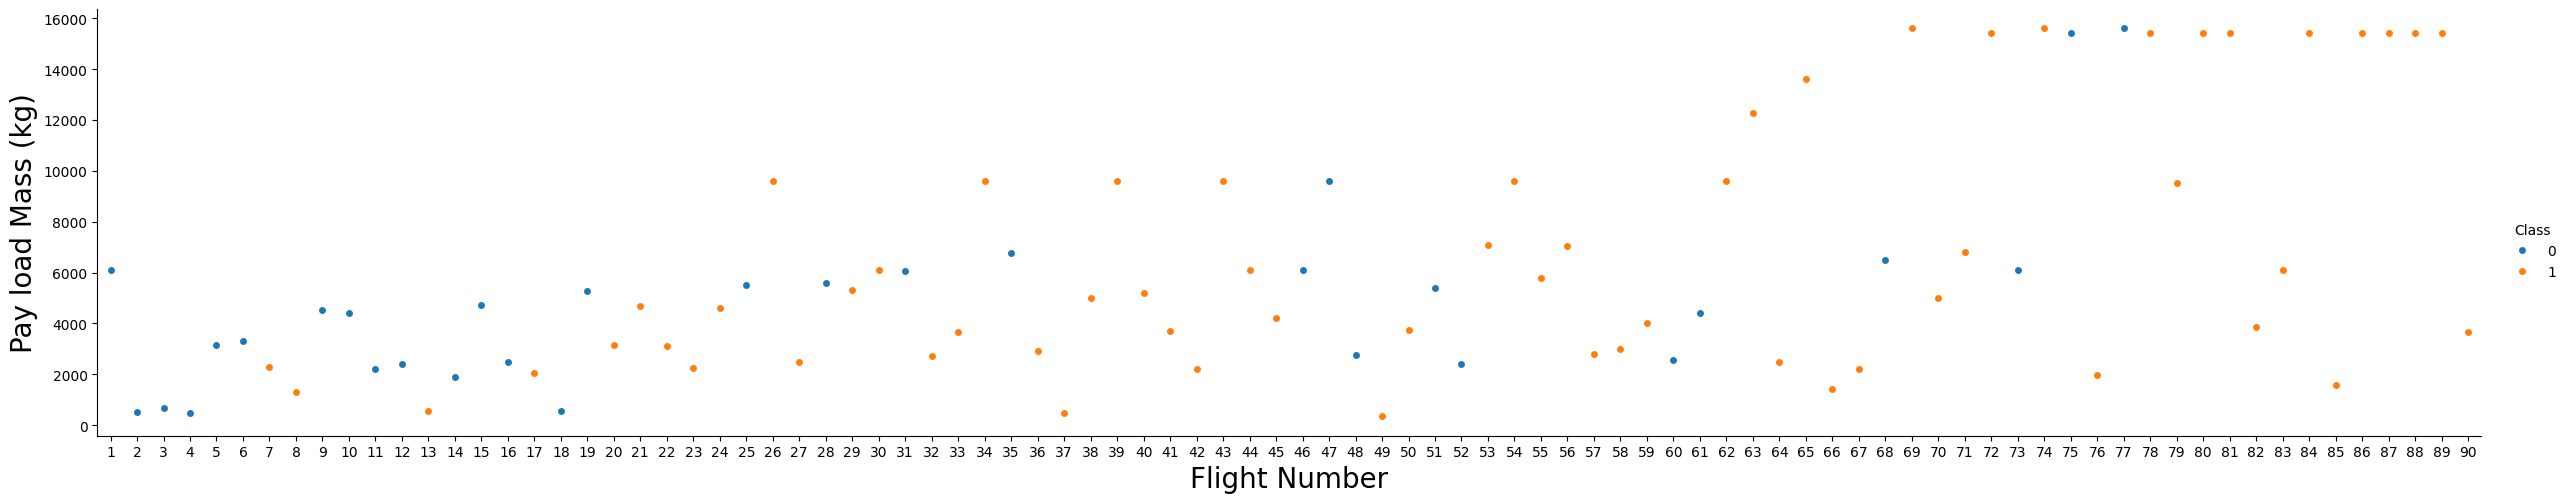

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

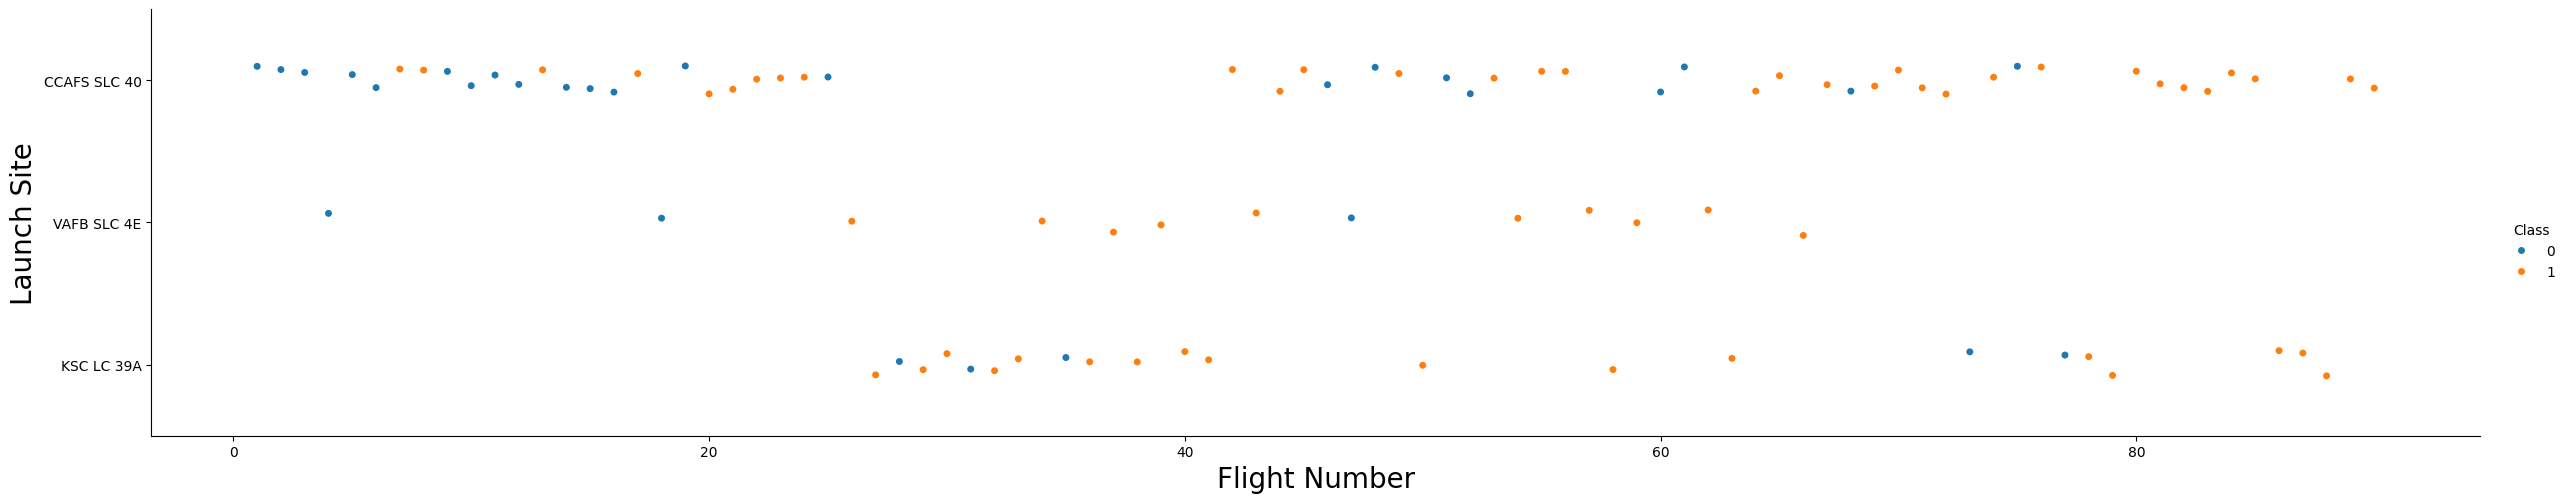

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

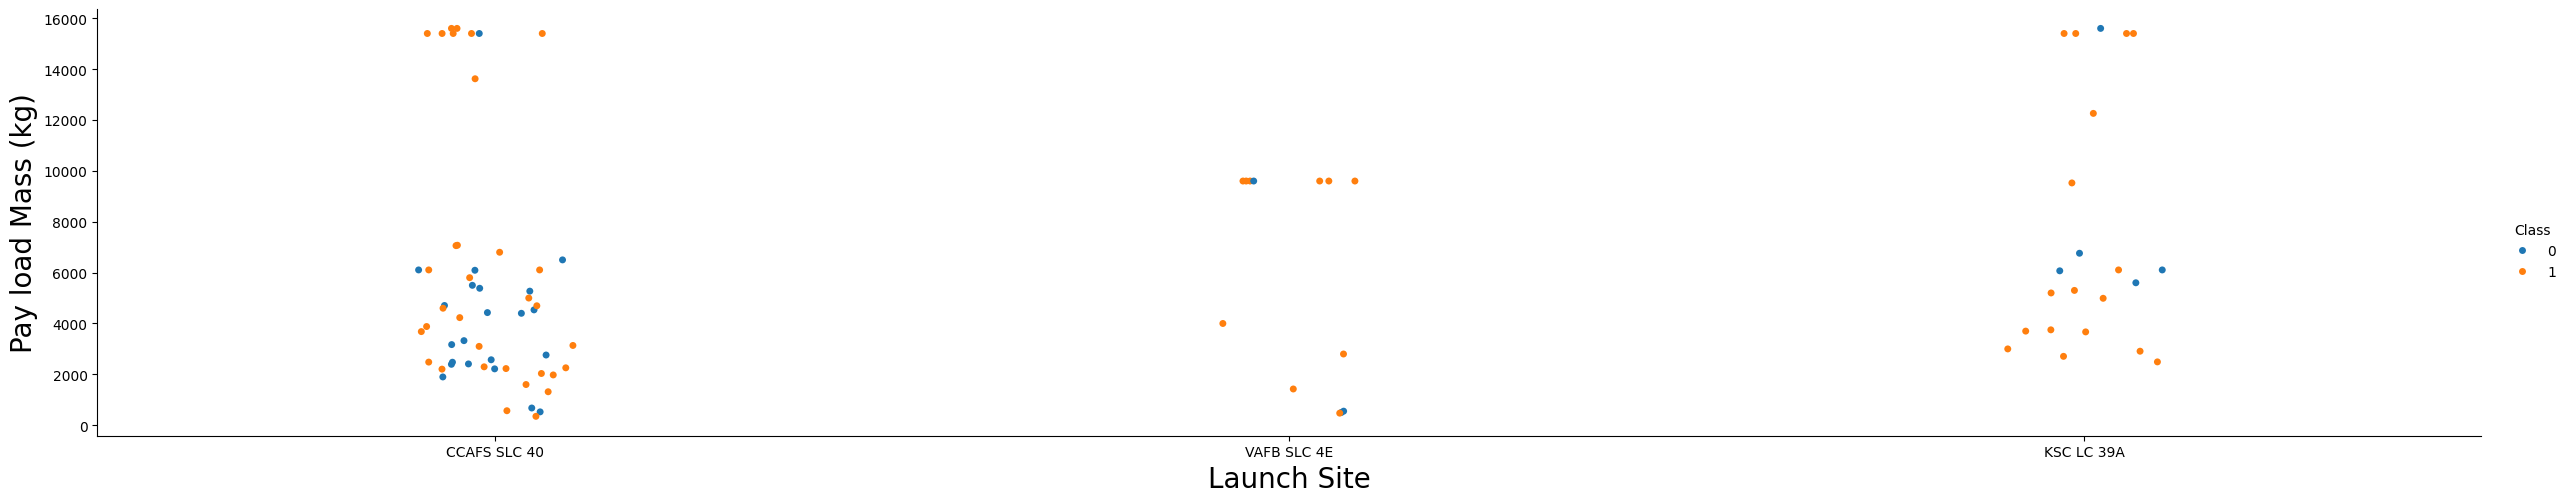

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column
temp = df.groupby(["Orbit"]).mean().reset_index()
temp2 = temp[["Orbit", "Class"]]
temp2["Class"] = temp2["Class"]*100
sns.barplot(x = "Orbit", y = "Class", data = temp2)

TypeError: agg function failed [how->mean,dtype->object]

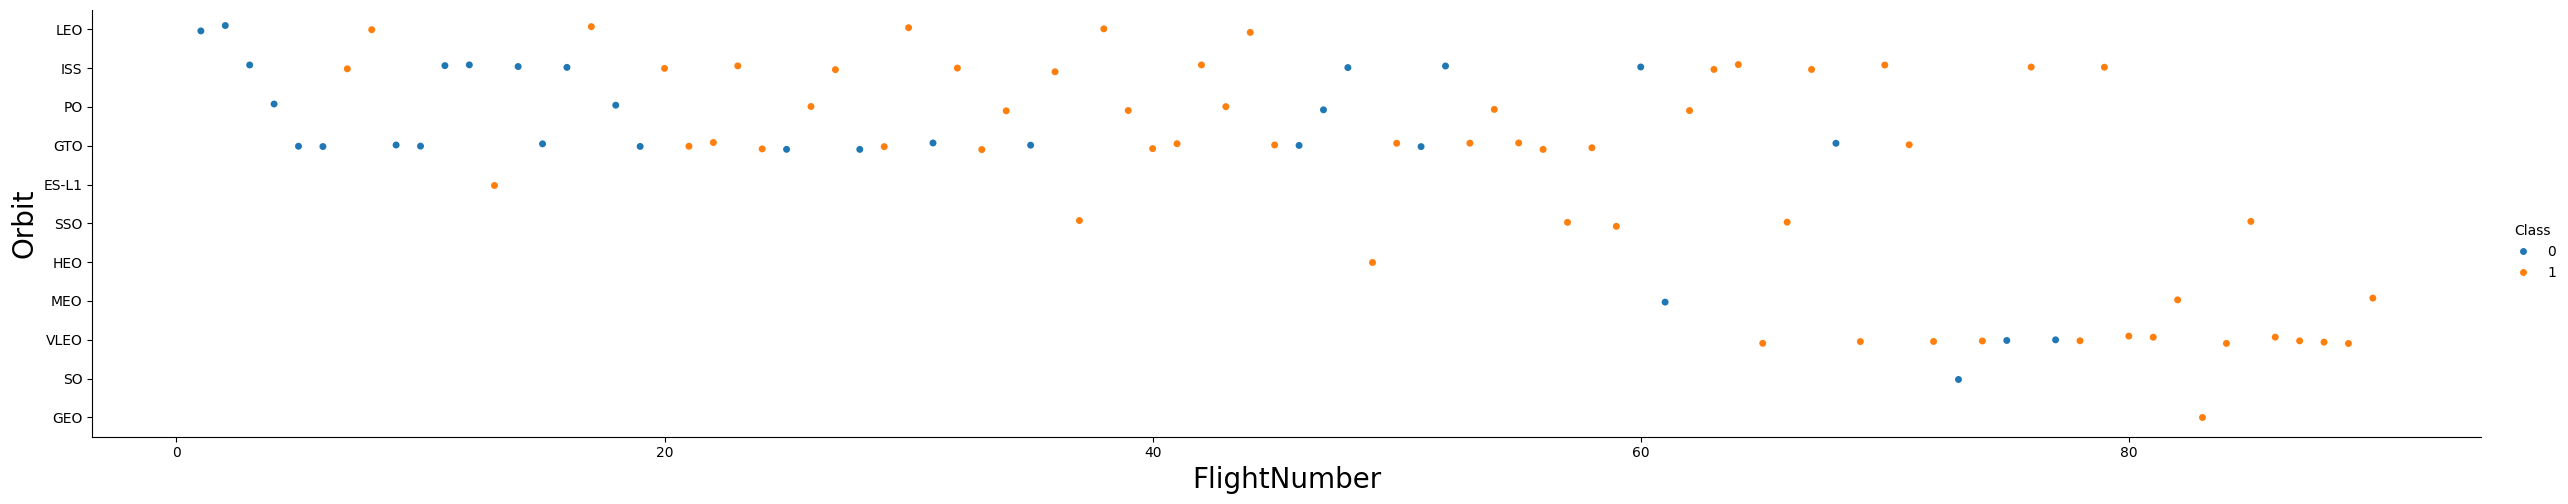

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

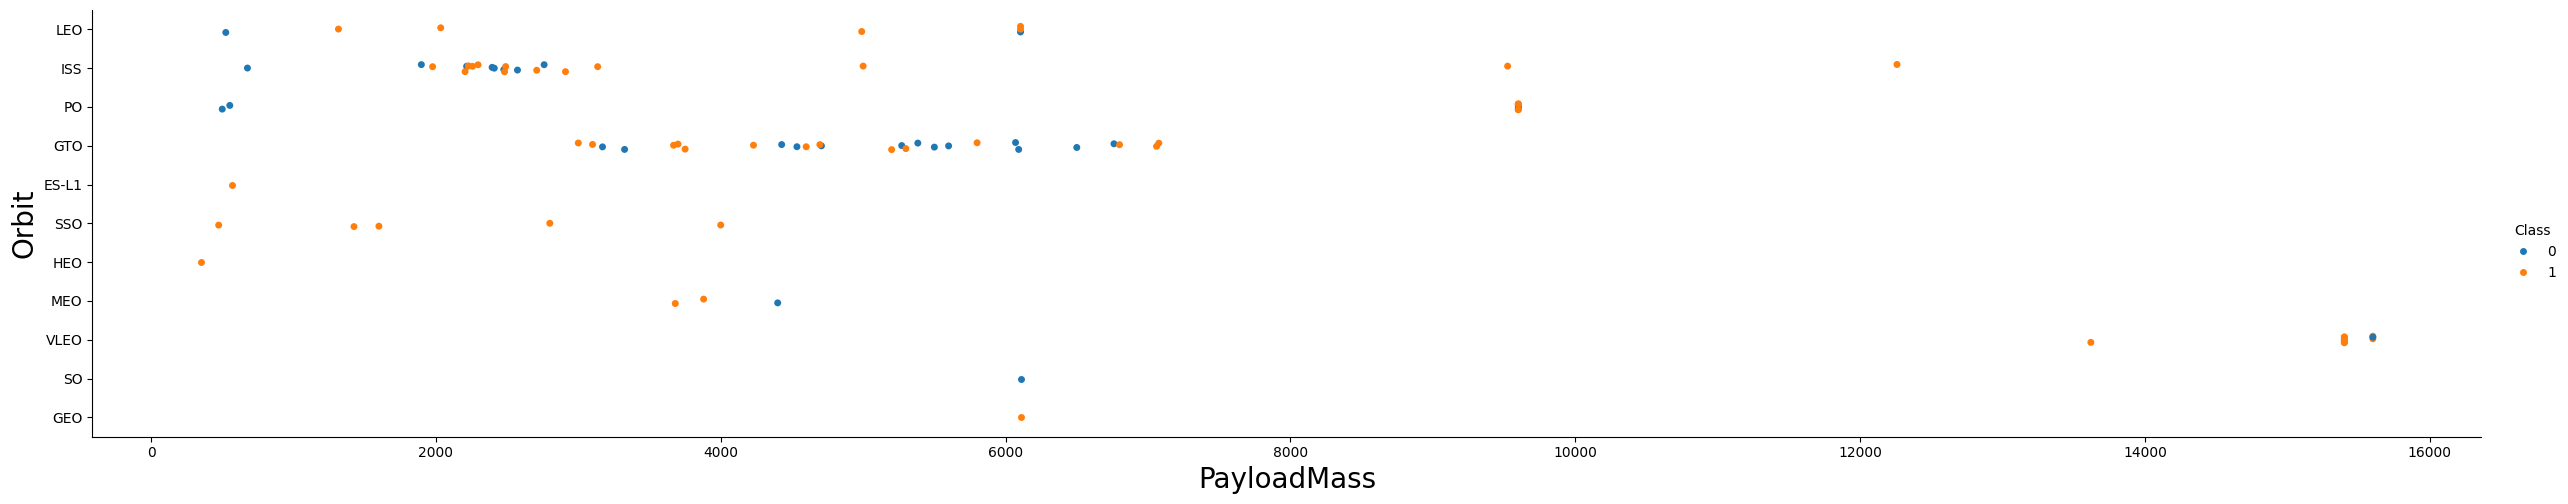

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [ ]:
# A function to Extract years from the date
def Extract_year(year):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


<Axes: xlabel='year', ylabel='Success Rate'>

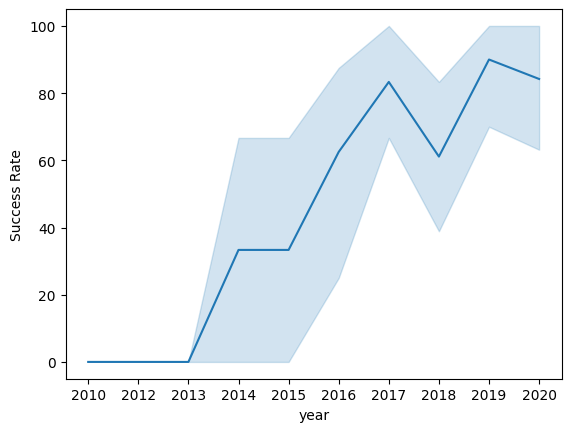

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year = []
df["year"] = Extract_year(year)
df["Success Rate"] = df["Class"] * 100
sns.lineplot(data = df, x = "year", y = "Success Rate")

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004

In [ ]:
# HINT: Use get_dummies() function on the categorical columns
oh_orbit = pd.get_dummies(features["Orbit"])
oh_launch = pd.get_dummies(features["LaunchSite"])
oh_landing = pd.get_dummies(features["LandingPad"])
oh_serial = pd.get_dummies(features["Serial"])
remainder = features[["FlightNumber","PayloadMass", "Flights", "GridFins", "Reused", "Legs", "Block","ReusedCount"]]
features_one_hot = pd.concat([oh_launch, oh_landing, oh_serial, oh_orbit], axis=1)
features_one_hot.head()

CCAFS SLC 40  KSC LC 39A  VAFB SLC 4E  5e9e3032383ecb267a34e7c7  \
0          True       False        False                     False   
1          True       False        False                     False   
2          True       False        False                     False   
3         False       False         True                     False   
4          True       False        False                     False   

   5e9e3032383ecb554034e7c9  5e9e3032383ecb6bb234e7ca  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   5e9e3032383ecb761634e7cb  5e9e3033383ecbb9e534e7cc  B0003  B0005  ...  \
0                     False                     False   True  False  ...   
1                     False                     False  False   True  ...   
2                     False                     False  False  False  ...   
3                     False                     False  False  False  ...   
4                     False                     False  False  False  ...   

     GEO    GTO    HEO    ISS    LEO    MEO     PO     SO    SSO   VLEO  
0  False  False  False  False   True  False  False  False  False  False  
1  False  False  False  False   True  False  False  False  False  False  
2  False  False  False   True  False  False  False  False  False  False  
3  False  False  False  False  False  False   True  False  False  False  
4  False   True  False  False  False  False  False  False  False  False  

[5 rows x 72 columns]

In [ ]:
# HINT: use astype function
features_one_hot.astype('float64')

CCAFS SLC 40  KSC LC 39A  VAFB SLC 4E  5e9e3032383ecb267a34e7c7  \
0            1.0         0.0          0.0                       0.0   
1            1.0         0.0          0.0                       0.0   
2            1.0         0.0          0.0                       0.0   
3            0.0         0.0          1.0                       0.0   
4            1.0         0.0          0.0                       0.0   
..           ...         ...          ...                       ...   
85           0.0         1.0          0.0                       0.0   
86           0.0         1.0          0.0                       0.0   
87           0.0         1.0          0.0                       0.0   
88           1.0         0.0          0.0                       0.0   
89           1.0         0.0          0.0                       0.0   

    5e9e3032383ecb554034e7c9  5e9e3032383ecb6bb234e7ca  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
..                       ...                       ...   
85                       0.0                       1.0   
86                       0.0                       1.0   
87                       0.0                       1.0   
88                       0.0                       0.0   
89                       0.0                       1.0   

    5e9e3032383ecb761634e7cb  5e9e3033383ecbb9e534e7cc  B0003  B0005  ...  \
0                        0.0                       0.0    1.0    0.0  ...   
1                        0.0                       0.0    0.0    1.0  ...   
2                        0.0                       0.0    0.0    0.0  ...   
3                        0.0                       0.0    0.0    0.0  ...   
4                        0.0                       0.0    0.0    0.0  ...   
..                       ...                       ...    ...    ...  ...   
85                       0.0                       0.0    0.0    0.0  ...   
86                       0.0                       0.0    0.0    0.0  ...   
87                       0.0                       0.0    0.0    0.0  ...   
88                       0.0                       1.0    0.0    0.0  ...   
89                       0.0                       0.0    0.0    0.0  ...   

    GEO  GTO  HEO  ISS  LEO  MEO   PO   SO  SSO  VLEO  
0   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  
1   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  
2   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0  
3   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0  
4   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  
86  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  
87  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  
88  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  
89  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0  

[90 rows x 72 columns]

#Interactive Visual Analytics with Folium lab

In [ ]:
import folium
import pandas as pd

In [ ]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [ ]:
# Download and read the `spacex_launch_geo.csv`
# from js import fetch
# import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
# resp = await fetch(URL)
# spacex_csv_file = io.BytesIO((await resp.arrayBuffer()).to_py())
spacex_df=pd.read_csv(URL)

In [ ]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

Launch Site        Lat        Long
0   CCAFS LC-40  28.562302  -80.577356
1  CCAFS SLC-40  28.563197  -80.576820
2    KSC LC-39A  28.573255  -80.646895
3   VAFB SLC-4E  34.632834 -120.610745

In [ ]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [ ]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for i in range (len(launch_sites_df.index)):
    coordinate = [launch_sites_df["Lat"][i], launch_sites_df["Long"][i]]
    circle = folium.Circle(coordinate, radius=100, color='#d35400', fill=True).add_child(folium.Popup(launch_sites_df["Launch Site"][i]))
    marker = folium.map.Marker(
        coordinate,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % launch_sites_df["Launch Site"][i],
            )
        )
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

In [ ]:
spacex_df.tail(10)

Launch Site        Lat       Long  class
46    KSC LC-39A  28.573255 -80.646895      1
47    KSC LC-39A  28.573255 -80.646895      1
48    KSC LC-39A  28.573255 -80.646895      1
49  CCAFS SLC-40  28.563197 -80.576820      1
50  CCAFS SLC-40  28.563197 -80.576820      1
51  CCAFS SLC-40  28.563197 -80.576820      0
52  CCAFS SLC-40  28.563197 -80.576820      0
53  CCAFS SLC-40  28.563197 -80.576820      0
54  CCAFS SLC-40  28.563197 -80.576820      1
55  CCAFS SLC-40  28.563197 -80.576820      0

In [ ]:
marker_cluster = MarkerCluster()


In [ ]:
launch_sites_df

Launch Site        Lat        Long
0   CCAFS LC-40  28.562302  -80.577356
1  CCAFS SLC-40  28.563197  -80.576820
2    KSC LC-39A  28.573255  -80.646895
3   VAFB SLC-4E  34.632834 -120.610745

In [ ]:
def func(item):
    if item == 1:
        return 'green'
    else:
        return 'red'

launch_sites_df["marker_color"] = spacex_df["class"].apply(func)
# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red
launch_sites_df

Launch Site        Lat        Long marker_color
0   CCAFS LC-40  28.562302  -80.577356          red
1  CCAFS SLC-40  28.563197  -80.576820          red
2    KSC LC-39A  28.573255  -80.646895          red
3   VAFB SLC-4E  34.632834 -120.610745          red

#Predictive Analysis

In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [ ]:
# from js import fetch
# import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(URL1)

In [ ]:
data.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(URL2)
X.head(100)

FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0        0.0        0.0        0.0  ...           0.0   
1         0.0        0.0        0.0        0.0  ...           0.0   
2         0.0        0.0        0.0        1.0  ...           0.0   
3         0.0        0.0        0.0        0.0  ...           0.0   
4         0.0        1.0        0.0        0.0  ...           0.0   
..        ...        ...        ...        ...  ...           ...   
85        0.0        0.0        0.0        0.0  ...           0.0   
86        0.0        0.0        0.0        0.0  ...           1.0   
87        0.0        0.0        0.0        0.0  ...           0.0   
88        0.0        0.0        0.0        0.0  ...           0.0   
89        0.0        0.0        0.0        0.0  ...           0.0   

    Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0            0.0           0.0           0.0             1.0            0.0   
1            0.0           0.0           0.0             1.0            0.0   
2            0.0           0.0           0.0             1.0            0.0   
3            0.0           0.0           0.0             1.0            0.0   
4            0.0           0.0           0.0             1.0            0.0   
..           ...           ...           ...             ...            ...   
85           0.0           1.0           0.0             0.0            1.0   
86           0.0           0.0           0.0             0.0            1.0   
87           0.0           0.0           0.0             0.0            1.0   
88           0.0           1.0           0.0             0.0            1.0   
89           0.0           0.0           1.0             0.0            1.0   

    Reused_False  Reused_True  Legs_False  Legs_True  
0            1.0          0.0         1.0        0.0  
1            1.0          0.0         1.0        0.0  
2            1.0          0.0         1.0        0.0  
3            1.0          0.0         1.0        0.0  
4            1.0          0.0         1.0        0.0  
..           ...          ...         ...        ...  
85           0.0          1.0         0.0        1.0  
86           0.0          1.0         0.0        1.0  
87           0.0          1.0         0.0        1.0  
88           0.0          1.0         0.0        1.0  
89           1.0          0.0         0.0        1.0  

[90 rows x 83 columns]

In [ ]:
Y = data["Class"].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# students get this
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

0             1         2         3         4      5      6   \
0  -1.712912 -1.948145e-16 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
1  -1.674419 -1.195232e+00 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
2  -1.635927 -1.162673e+00 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
3  -1.597434 -1.200587e+00 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
4  -1.558942 -6.286706e-01 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
..       ...           ...       ...       ...       ...    ...    ...   
85  1.558942  1.991005e+00  0.174991  0.945537  0.202528 -0.106 -0.106   
86  1.597434  1.991005e+00  1.003894  0.945537  0.202528 -0.106 -0.106   
87  1.635927  1.991005e+00  3.490605  0.945537  1.966480 -0.106 -0.106   
88  1.674419  1.991005e+00  1.003894  0.945537  0.202528 -0.106 -0.106   
89  1.712912 -5.192140e-01 -0.653913  0.945537 -0.973440 -0.106 -0.106   

          7      8         9   ...        73        74        75        76  \
0  -0.654654 -0.106 -0.551677  ... -0.185695 -0.215666 -0.185695 -0.106000   
1  -0.654654 -0.106 -0.551677  ... -0.185695 -0.215666 -0.185695 -0.106000   
2  -0.654654 -0.106  1.812654  ... -0.185695 -0.215666 -0.185695 -0.106000   
3  -0.654654 -0.106 -0.551677  ... -0.185695 -0.215666 -0.185695 -0.106000   
4   1.527525 -0.106 -0.551677  ... -0.185695 -0.215666 -0.185695 -0.106000   
..       ...    ...       ...  ...       ...       ...       ...       ...   
85 -0.654654 -0.106 -0.551677  ... -0.185695 -0.215666  5.385165 -0.106000   
86 -0.654654 -0.106 -0.551677  ...  5.385165 -0.215666 -0.185695 -0.106000   
87 -0.654654 -0.106 -0.551677  ... -0.185695 -0.215666 -0.185695 -0.106000   
88 -0.654654 -0.106 -0.551677  ... -0.185695 -0.215666  5.385165 -0.106000   
89 -0.654654 -0.106 -0.551677  ... -0.185695 -0.215666 -0.185695  9.433981   

          77        78        79        80        81        82  
0   1.870829 -1.870829  0.835532 -0.835532  1.933091 -1.933091  
1   1.870829 -1.870829  0.835532 -0.835532  1.933091 -1.933091  
2   1.870829 -1.870829  0.835532 -0.835532  1.933091 -1.933091  
3   1.870829 -1.870829  0.835532 -0.835532  1.933091 -1.933091  
4   1.870829 -1.870829  0.835532 -0.835532  1.933091 -1.933091  
..       ...       ...       ...       ...       ...       ...  
85 -0.534522  0.534522 -1.196843  1.196843 -0.517306  0.517306  
86 -0.534522  0.534522 -1.196843  1.196843 -0.517306  0.517306  
87 -0.534522  0.534522 -1.196843  1.196843 -0.517306  0.517306  
88 -0.534522  0.534522 -1.196843  1.196843 -0.517306  0.517306  
89 -0.534522  0.534522  0.835532 -0.835532 -0.517306  0.517306  

[90 rows x 83 columns]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
Y_test.shape

(18,)

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [ ]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,Y_test)

0.8333333333333334

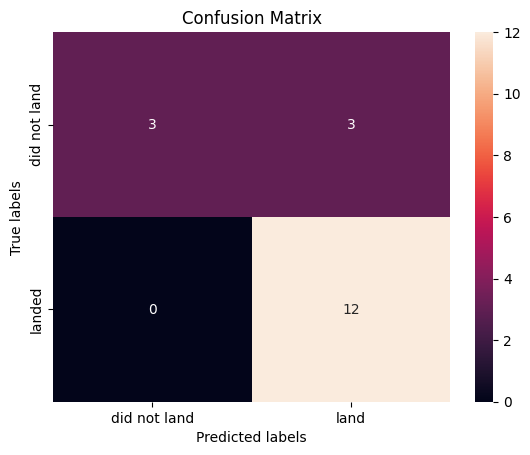

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [ ]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)

0.8333333333333334

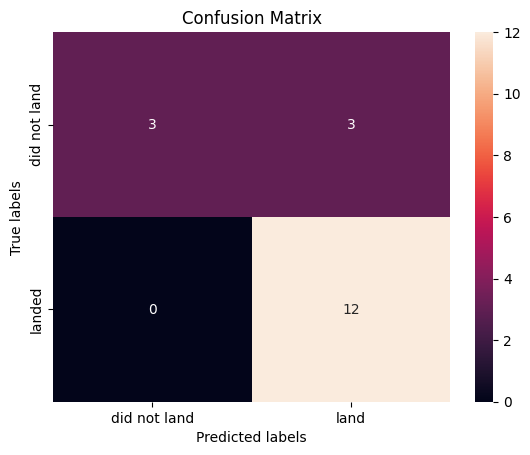

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


In [ ]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.6666666666666666

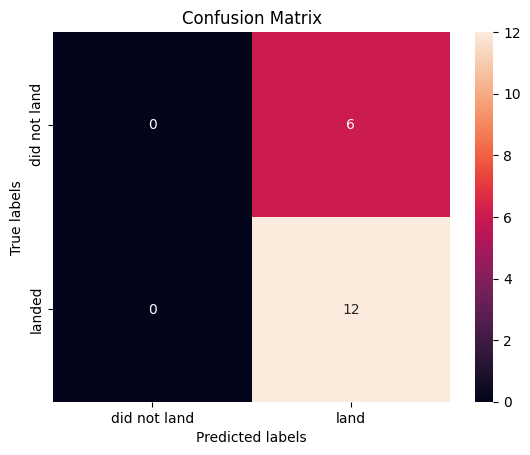

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [ ]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.8333333333333334

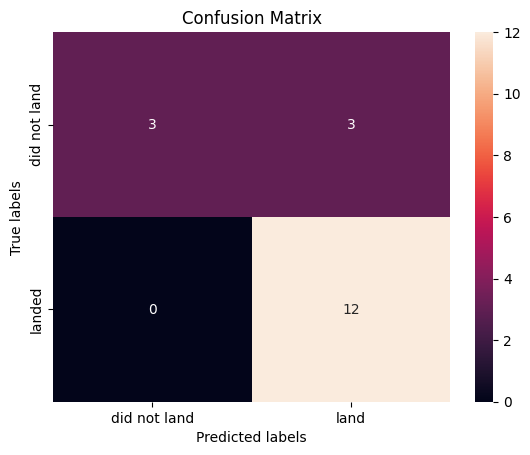

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.8333333333333334, 0.8333333333333334, 0.6666666666666666, 0.8333333333333334]
